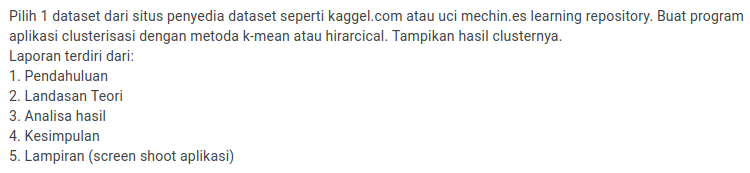

# CLUSTERING TASK
#### Copyright © 2020 Novita G.

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import math
import random
import string
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Read Data

In [26]:
df_mall = pd.read_csv('Mall_Customers.csv')
pd.set_option('display.max_rows', None)
df_mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [27]:
df_mall['Genre'] = df_mall[['Genre']].replace(['Male', 'Female'], [0, 1])
df_mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


## Functions and Procedures

In [139]:
def euclidean(x, y):
    d = math.sqrt(sum((x - y)**2))
    return d

In [128]:
def kmeans(k, max_iter, df):
    
    centroid = {}
    
    for c in range(k):
        ran = random.randint(0, len(df))
        centroid[c] = df[ran]
#         print(centroid)
        
#     df.to_numpy()
#     np.diff(df)

    for it in range(max_iter):
        cluster = {}
        
        for i in range(k):
            cluster[i] = []
            
        for x in df:
            
#             dist = []
#             for c in centroid:
#                 d = euclidean(x, centroid[c])
#                 dist.append(d)
#                 min_dist = min(dist)
#                 min_dist_idx = dist.index(min_dist)
#                 cluster[min_dist_idx].append(x)
            
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)
            
        prev_centroid = dict(centroid)
            
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis = 0)

        for c in centroid:
            old_centroid = prev_centroid[c]
            curr_centroid = centroid[c]

    return centroid, cluster

## Tuning Hyperparameters

In [183]:
k = 5
max_iter = 1000

In [184]:
centroid, cluster = kmeans(k, max_iter, data)

## Main

In [185]:
data = (df_mall.iloc[:, 1:]).to_numpy()

In [186]:
df = []
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], c[2], c[3], key))
            
# Convert to dataframe
df = pd.DataFrame(df)
df.columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,37,97,32,0
1,0,46,98,15,0
2,1,41,99,39,0
3,1,54,101,24,0
4,1,41,103,17,0
5,1,34,103,23,0
6,0,33,113,8,0
7,1,47,120,16,0
8,1,45,126,28,0
9,0,32,137,18,0


In [187]:
for i in range(k):
    print('Centroid', i + 1, ':', centroid[i])

Centroid 1 : [  0.7  41.  109.7  22. ]
Centroid 2 : [ 0.39285714 40.17857143 78.89285714 17.42857143]
Centroid 3 : [ 0.53846154 32.69230769 86.53846154 82.12820513]
Centroid 4 : [ 0.5        24.82142857 28.71428571 74.25      ]
Centroid 5 : [ 0.62105263 44.89473684 48.70526316 42.63157895]


To see list by cluster, uncomment the code below:

In [ ]:
test = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster.items() ]))

col = []
for i in range(len(test.columns)):
    col.append('Cluster ' + str(i + 1))

test.columns = col
test

## Plot

<function matplotlib.pyplot.show(close=None, block=None)>

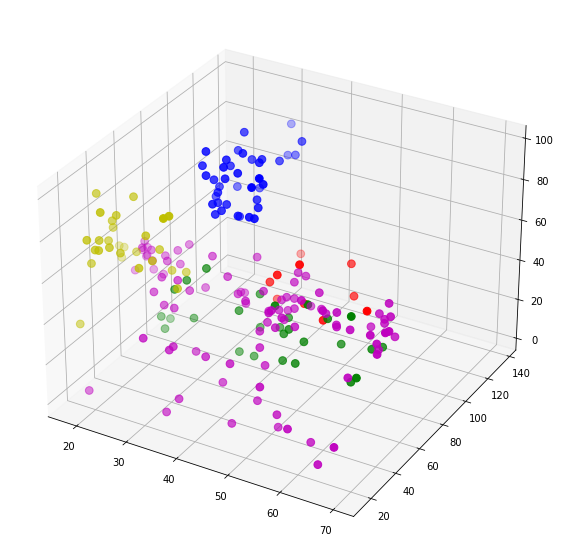

In [189]:
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'darkcyan', 'olivedrab', 'honeydew', 'lime']

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    ax.scatter(
        df.Age[df['Cluster'] == i], 
        df['Annual Income (k$)'][df['Cluster'] == i], 
        df['Spending Score (1-100)'][df['Cluster'] == i], 
        c=colors[i], s=60
    )
    
plt.show